# 5 - Checking the hypothesis

In [1]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


# Importing data

df = pd.read_csv('data/eda_cleaned+improved.csv', delimiter=",")

# Setting date column to date time.
df['date'] = pd.to_datetime(df['date'])

# Transforming the 'zipcode' column to string data type
df['zipcode'] = df['zipcode'].astype(str).sort_values()

## Checking for houses fitting 'mid price range' in interesting zipcode-areas

In [2]:
# List of the desired zip codes created through own research. See book 4, Chapter Livelihood

desired_zipcodes = ['98102', '98112', '98122', '98121', '98103', '98109', '98107', '98104', '98117', '98118']

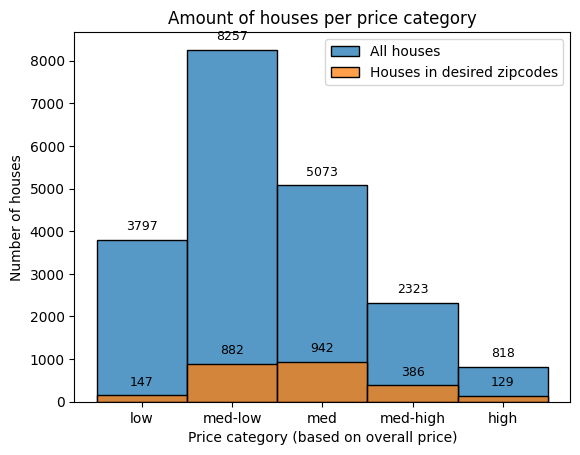

The sum of houses in the desired zipcode across all price categories is 2486 of 20268.


In [3]:
# Ordering categorical values for the chart

df['price_cat_total'] = pd.Categorical(df['price_cat_total'], ['low', 'med-low', 'med', 'med-high', 'high'])

# This histogram shows the amount of houses for each price category

ax = sns.histplot(
    data=df,
    x='price_cat_total',
    label='All houses'
)

# Filtering the dataframe for houses in the interesting neighborhoods

df_desired_zips = df[df['zipcode'].isin(desired_zipcodes)]

# Adding the filtered dataframe to the histogram

sns.histplot(
    data=df_desired_zips,
    x='price_cat_total',
    label = 'Houses in desired zipcodes'
)

# Adding labels to the bars

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
                
plt.xlabel('Price category (based on overall price)')
plt.ylabel('Number of houses')
plt.title('Amount of houses per price category')
plt.legend(loc='upper right')

plt.show()

print(f'The sum of houses in the desired zipcode across all price categories is {df_desired_zips.house_id.count()} of {df.house_id.count()}.')


---
**Interim finding**
**&rarr; There is an offer across all price categories for houses in the desired zip codes which stand for a lively, central neighborhood.**

---

In the next step, I focus on the houses matching the medium price range and are located in the desired zip codes.

## Checking the med price segment for quality of houses

In [4]:
# Filtering the houses in the desired zip areas for medium price category, saving it on a new df for further use

df_desired_zips_and_price = df_desired_zips[df_desired_zips['price_cat_total'] == 'med']

To drill down even further, i'll have a look at the houses per neighborhood name, which is a speaking translation of the zip code.

In addition to that I'll filter out houses, that are in poor condition or offer a low standard according to the king county house grading systen.

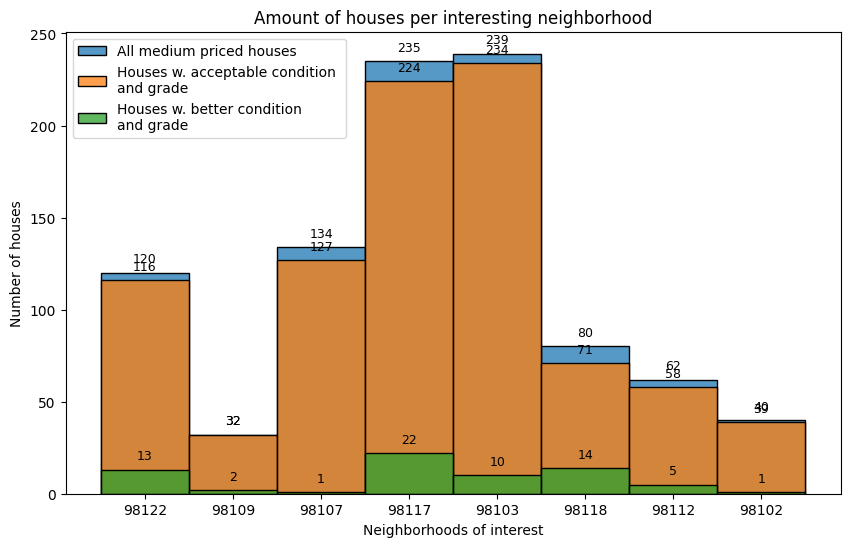

The sum of houses meeting the minimum expectation for grade and condition are 901 of 942 houses total in the med price segment.
The sum of houses meeting the higher expectation for grade and condition are 68 of 942 houses total in the med price segment.


In [5]:
# Creating a wider figure
plt.figure(figsize=(10, 6))


# Creating a histogram showing houses per neighborhood
ax = sns.histplot(
    data=df_desired_zips_and_price,
    x='zipcode',
    label='All medium priced houses'
)

# Filtering the houses and excluding houses with condition poorer than 3 and grade worth than 7
df_good_quality = df_desired_zips_and_price[
    (df_desired_zips_and_price['condition'] >= 3) & (df_desired_zips_and_price['grade'] >= 7)
]

# Adding the new data frame to the histogram
sns.histplot(
    data=df_good_quality,
    x='zipcode',
    label='Houses w. acceptable condition \nand grade'
)

# Filtering the houses and excluding houses with condition poorer than 2 and grade worth than 8
df_better_quality = df_desired_zips_and_price[
    (df_desired_zips_and_price['condition'] > 3) & (df_desired_zips_and_price['grade'] > 7)
]

# Adding the new data frame to the histogram
sns.histplot(
    data=df_better_quality,
    x='zipcode',
    label='Houses w. better condition \nand grade'
)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Proper labeling of the chart
plt.xlabel('Neighborhoods of interest')
plt.ylabel('Number of houses')
plt.title('Amount of houses per interesting neighborhood')
plt.legend(loc='upper left')

plt.show()

print(f'The sum of houses meeting the minimum expectation for grade and condition are {df_good_quality.house_id.count()} of {df_desired_zips_and_price.house_id.count()} houses total in the med price segment.')
print(f'The sum of houses meeting the higher expectation for grade and condition are {df_better_quality.house_id.count()} of {df_desired_zips_and_price.house_id.count()} houses total in the med price segment.')


---
**Interim findings**


**&rarr; 5 zip code areas offer more than 1 house meeting the better condition/grad requirements with 98117 offering the most houses**


**&rarr; Most of the houses per zip code area have average or better condition**


**&rarr; Most of the houses per zip code area have a average grade of construction or even better**



---

In the next step, let's find when it is the right time to buy. Therefore I try to identify trends in the given data

## Identifying price trends to assume the right time to buy

In [6]:
# Adding month and year as a column to the last data frame
    
df_good_quality.loc[:, 'year'] = df_good_quality.loc[:, 'date'].dt.year
df_good_quality.loc[:, 'month'] = df_good_quality.loc[:, 'date'].dt.month



/var/folders/wg/07rp9njx20s2h8ysbvnfcd400000gn/T/ipykernel_53717/3752107223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_quality.loc[:, 'year'] = df_good_quality.loc[:, 'date'].dt.year
/var/folders/wg/07rp9njx20s2h8ysbvnfcd400000gn/T/ipykernel_53717/3752107223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_quality.loc[:, 'month'] = df_good_quality.loc[:, 'date'].dt.month


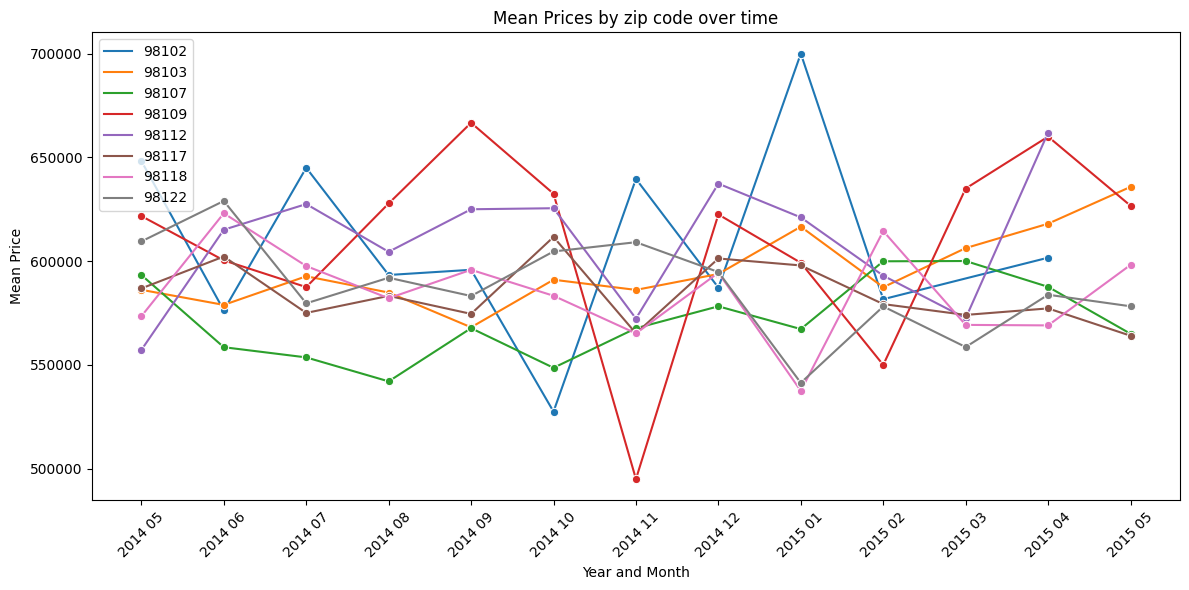

In [7]:
# Creating a pivot table to calculate the mean price for each neighborhood, year, and month
pivot_table = df_good_quality.pivot_table(values='price', index=['year', 'month', 'zipcode'], aggfunc='mean').reset_index()

# Combining year and month for x-axis labels
pivot_table['year_month'] = pivot_table['year'].astype(str) + ' ' + pivot_table['month'].apply(lambda x: '{:02d}'.format(x))

# Setting up a seabord lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, x='year_month', y='price', hue='zipcode', marker='o')

# Setting labels for the chart
plt.xlabel('Year and Month')
plt.ylabel('Mean Price')
plt.title('Mean Prices by zip code over time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


---
**Interim finding**

**&rarr; Each neighborhood has its own price price development**

**&rarr; The timeframe of the data set is not big enough to identify repeating pattern**

**&rarr; Assumption for 98112: If the november collapse is a pattern, look for offerings at the same time next year.**

**&rarr; Assumption for 98107: The summer months could be a good time to buy**

**&rarr; Assumption for the rest: There is no specific time in the year. Wait for good offerings anytime**

---

In the next step, let's discuss other characteristics of the resulting set.

In [8]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Create the boxplot 
sns.boxplot(data=df_top_quality, x='zipcode', y='sqft_living')

# Add horizontal lines in the background
for value in range(0, 4500, 100):  # Customize the range and interval as needed
    plt.axhline(value, color='gray', linestyle='dashed', linewidth=0.5)


# Set labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Living area in sqft')
plt.title('Boxplot of living-area per Neighborhood')


plt.show()

NameError: name 'df_top_quality' is not defined

<Figure size 1200x600 with 0 Axes>

---
**Interim finding**

**&rarr; In 98118 the houses are usually larger than in the other areas**

---


In [ ]:
# Create a scatter map
fig = px.scatter_mapbox(
    df_better_quality,
    lat='lat',
    lon='long',
    hover_name='house_id',
    hover_data=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'price', 'neighborhood_name'],
    mapbox_style="open-street-map" 
)

# Update the layout of the map
fig.update_layout(
    title='Locations of objects of interest',
    mapbox=dict(
        center=dict(lat=47.606209, lon=-122.332069),  # Seattle, WA
        zoom=10
    ),
    height=600
)

# Show the map
fig.show()



## Checking lot vs. living size for final set of houses

The following code finds houses in the data frame which lot size differs just within a defined range from the living area.

The motivation behind this is to find places with small / no gardens at all, meaning city flats in areas with higher density of the buildings.

In [ ]:
# Checking, houses living area vs lot area filtered_df = df_sizes[df_sizes['sqft_living'] < df_sizes['sqft_lot']]

threshold_percent = 10

similar_house_ids = []

for house_id, group in df_better_quality.groupby('house_id'):
    sqft_lot_values = group['sqft_lot'].values
    sqft_living_values = group['sqft_living'].values
    
    # Calculate the maximum allowed difference in sqft_lot and sqft_living
    max_difference = max(sqft_lot_values) * (threshold_percent / 100)
    
    # Check if the difference between sqft_lot and sqft_living is within the threshold
    if all(abs(a - b) <= max_difference for a, b in zip(sqft_lot_values, sqft_living_values)):
        similar_house_ids.append(house_id)

print(similar_house_ids)

[5016002275, 7234600098, 8129700085, 9126100550]


## Summary


### Hypothesis 1. Time of the year will affect prices to a great extend (e.g. prices in summer 10% higher than winter). As a result buying at a specific time will save my client money

**&rarr; rejected**

At least for the neighborhoods of interest, the price development shows different patterns for each neighborhood. In addition tho this, the amount of houses with multiple sales is too small to use for a general price trends analysis. The Time frame the data set covers is also very narrow.

If we assume the development over the one year represented in the data to be a pattern, then, for some neighborhoods, there is a chance for prices to be lower in certain months of the year.


### Hypothesis 2: Lively, central neighborhoods are close to the city-center.

**&rarr; confirmed**

The research of lively, central neighborhoods outside the data sets and comparing those findings with the data set show that the resulting houses are in proximity to seattle centre. 


### Hypothesis 3: Lively, central neighborhoods are high in demand and therefore will not be easy to find in middle price range / or just with compromises


**&rarr; rejected**

In the zip codes representing lively, central neighborhoods is no shortage in offers within the mid price range. The represented zip codes do not necessarily more expensive neighborhoods 


### Hypothesis 4: Houses where sqft lot is more than 10% higher than sqft-living are not in the city center 

**&rarr; rejected**

Of the 68 houses in the final data set only 4 houses had a lot size not being more than 10% larger than the living area. This means that most of the houses located close to the city centre have a bigger lot area than living area what could be garden or similar.



